# Machine Learning

# Base Logistic Regression 

- Importing the libraries to making the instantiate the machine learning model
- Import the data
- Preprocess the data to make a column to indicate whether a flight was delayed

In [2]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd

In [3]:
import pandas as pd
flights = pd.read_csv(r"C:\Users\ahisse\Documents\Flatiron\ML_Capstone\Project\sample_project\FlightDelays.csv")

In [4]:
flights.DAY_WEEK = flights.DAY_WEEK.astype('category')

#flights.CRS_DEP_TIME = [round(t / 100) for t in flights.CRS_DEP_TIME]
flights.CRS_DEP_TIME = flights.CRS_DEP_TIME.astype('category')

flights['isDelayed'] = [1 if status == 'delayed' else 0 for status in flights['Flight Status']]

flights

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status,isDelayed
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime,0
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime,0
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime,0
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime,0
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,645,RU,644,EWR,199,1/31/2004,2761,DCA,0,6,31,N15555,ontime,0
2197,1700,RU,1653,EWR,213,1/31/2004,2497,IAD,0,6,31,N16976,ontime,0
2198,1600,RU,1558,EWR,199,1/31/2004,2361,DCA,0,6,31,N14902,ontime,0
2199,1359,RU,1403,EWR,199,1/31/2004,2216,DCA,0,6,31,N16961,ontime,0


In [5]:
predictors = ['DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER', 'DEP_TIME']
outcome = 'isDelayed'

X = pd.get_dummies(flights[predictors], drop_first=True) #convert predictors into dummies
y = flights[outcome] # target variable, which was converted into dummies earlier
classes = ['ontime', 'delayed']

In [6]:
X #predictors

,DEP_TIME,DAY_WEEK_2,DAY_WEEK_3,DAY_WEEK_4,DAY_WEEK_5,DAY_WEEK_6,DAY_WEEK_7,CRS_DEP_TIME_630,CRS_DEP_TIME_640,CRS_DEP_TIME_645,...,ORIGIN_IAD,DEST_JFK,DEST_LGA,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US
0,1455,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1640,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,1245,0,0,1,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
3,1709,0,0,1,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
4,1035,0,0,1,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,644,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2197,1653,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2198,1558,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2199,1403,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


- After defining the target variable and predictors, it's time to fit the data and analyze the results.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0) #train, test split

In [8]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train) #fit the train data set

LogisticRegression(max_iter=1000)

In [9]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

- Here, we will look at the overall accuracy of the model along with the confusion matrix and classification report. 
- The AUC number of the ROC Curve will help us understand how well the model can differeniate between True Positive and False Positives. 

In [10]:
#accuracy as one evaluation metrics
from sklearn import metrics
print("Accuracy::{:.3f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy::0.810


In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

In [12]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=logreg.classes_)

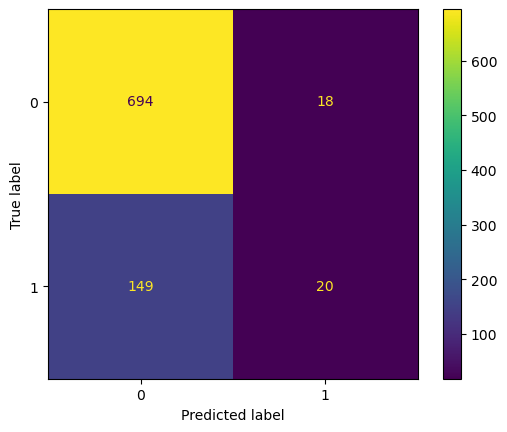

In [13]:
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,
                               display_labels=logreg.classes_)
disp.plot()
plt.show()

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       712
           1       0.53      0.12      0.19       169

    accuracy                           0.81       881
   macro avg       0.67      0.55      0.54       881
weighted avg       0.77      0.81      0.76       881



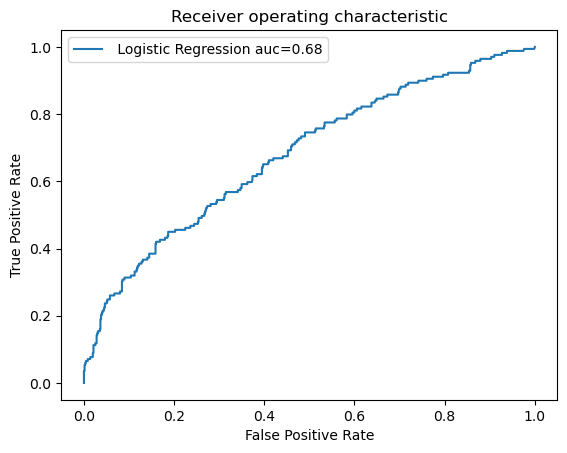

In [15]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
#keep probabilities for the positive outcome only
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
pyplot.plot(fpr,tpr,label=" Logistic Regression auc="+str(auc.round(2)))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc=4)
# show the legend
pyplot.legend()
plt.show()

# Logistic Regression with Weights

In [16]:
weights = {0: 0.30, 1: 0.70}
logreg = LogisticRegression(class_weight=weights, max_iter = 1000)
logreg.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.3, 1: 0.7}, max_iter=1000)

In [17]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [18]:
#accuracy as one evaluation metrics
from sklearn import metrics
print("Accuracy::{:.3f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy::0.764


In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

In [20]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=logreg.classes_)

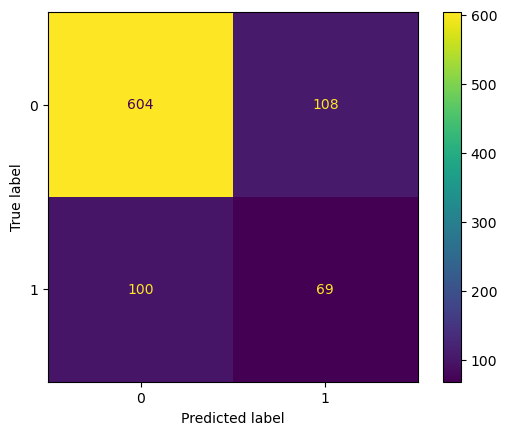

In [21]:
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,
                               display_labels=logreg.classes_)
disp.plot()
plt.show()

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       712
           1       0.39      0.41      0.40       169

    accuracy                           0.76       881
   macro avg       0.62      0.63      0.63       881
weighted avg       0.77      0.76      0.77       881



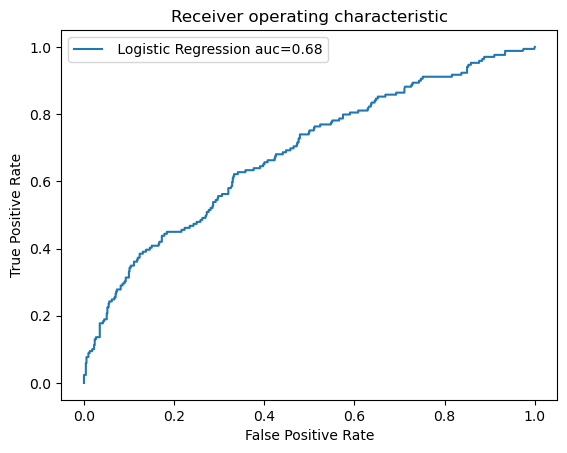

In [23]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
#keep probabilities for the positive outcome only
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
pyplot.plot(fpr,tpr,label=" Logistic Regression auc="+str(auc.round(2)))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc=4)
# show the legend
pyplot.legend()
plt.show()

# SMOTE - Class imbalance resolution

In [24]:
sm = SMOTE(random_state=43)

In [25]:
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [26]:
print(y_train_resampled.value_counts())
# Originally the classes were resample at perfect split

0    1061
1    1061
Name: isDelayed, dtype: int64


In [27]:
logreg.fit(X_train_resampled,y_train_resampled)

LogisticRegression(class_weight={0: 0.3, 1: 0.7}, max_iter=1000)

In [28]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,

In [29]:
print("Accuracy::{:.3f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy::0.683


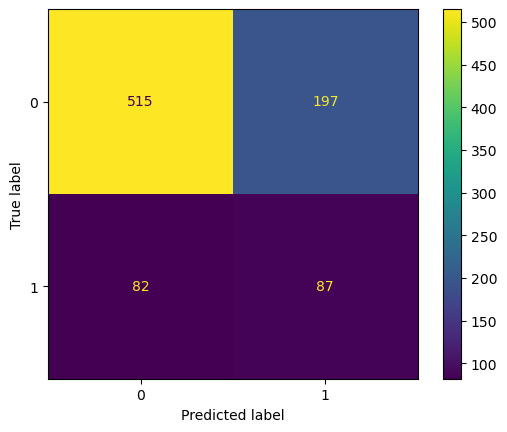

In [30]:
smote_cnf_matrix = confusion_matrix(y_test, y_pred, labels=logreg.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=smote_cnf_matrix,
                               display_labels=logreg.classes_)
disp.plot()
plt.show()

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.72      0.79       712
           1       0.31      0.51      0.38       169

    accuracy                           0.68       881
   macro avg       0.58      0.62      0.59       881
weighted avg       0.76      0.68      0.71       881



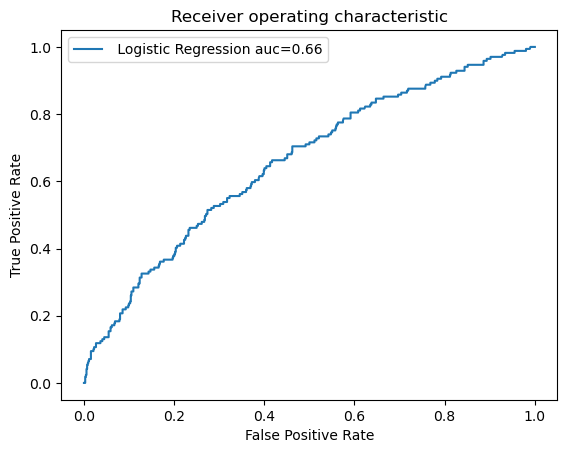

In [32]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
#keep probabilities for the positive outcome only
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
pyplot.plot(fpr,tpr,label=" Logistic Regression auc="+str(auc.round(2)))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc=4)
# show the legend
pyplot.legend()
plt.show()

# Decesion Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 0, criterion="entropy")

In [34]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [35]:
dt_y_pred = tree.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score
print("Accuracy on test set:",accuracy_score(dt_y_pred, y_test))

Accuracy on test set: 0.8524404086265607


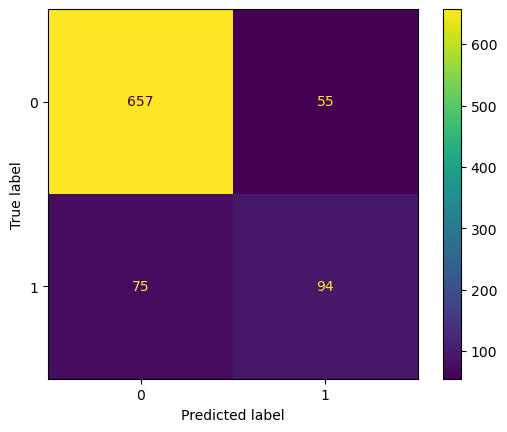

In [37]:
dt_cnf_matrix = confusion_matrix(y_test, dt_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=dt_cnf_matrix,
                               display_labels=logreg.classes_)
disp.plot()
plt.show()

In [38]:
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       712
           1       0.63      0.56      0.59       169

    accuracy                           0.85       881
   macro avg       0.76      0.74      0.75       881
weighted avg       0.85      0.85      0.85       881



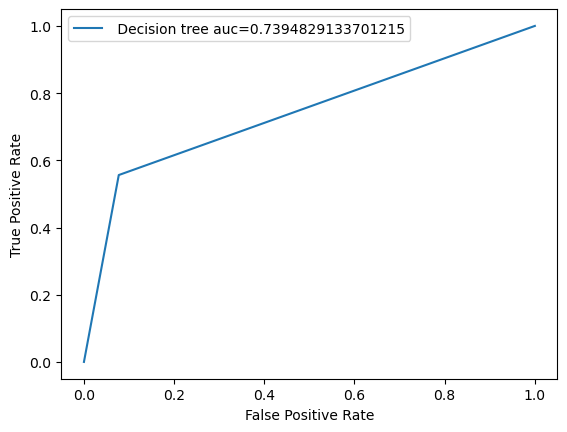

In [39]:
from sklearn import metrics
from matplotlib import pyplot
fpr, tpr, _ = metrics.roc_curve(y_test,  dt_y_pred)
auc = metrics.roc_auc_score(y_test,  dt_y_pred)
pyplot.plot(fpr,tpr,label=" Decision tree auc="+str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()
plt.show()

# RANDOM FOREST

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
X_train_forest, X_test_forest, y_train_forest, y_test_forest = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

In [43]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [44]:
y_pred_forest = rf.predict(X_test_forest)

In [45]:
accuracy = accuracy_score(y_test_forest, y_pred_forest)
print("Accuracy:", accuracy)

Accuracy: 0.9342403628117913


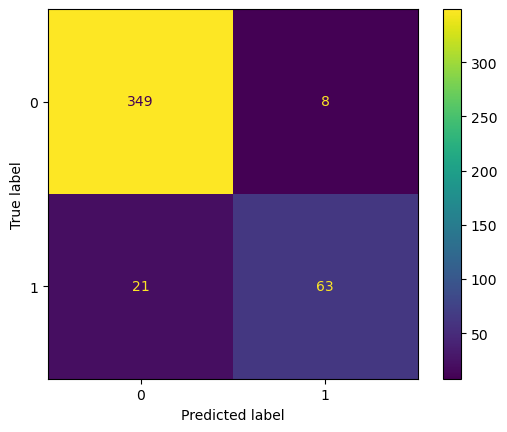

In [46]:
rt_cnf_matrix = confusion_matrix(y_test_forest, y_pred_forest, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=rt_cnf_matrix,
                               display_labels=logreg.classes_)
disp.plot()
plt.show()

In [47]:
print(classification_report(y_test_forest, y_pred_forest))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       357
           1       0.89      0.75      0.81        84

    accuracy                           0.93       441
   macro avg       0.92      0.86      0.89       441
weighted avg       0.93      0.93      0.93       441



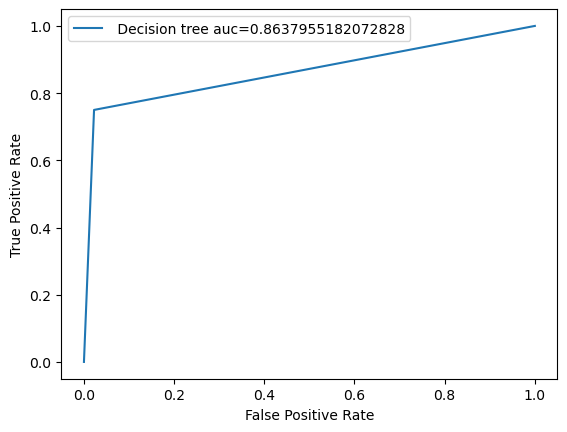

In [48]:
from sklearn import metrics
from matplotlib import pyplot
fpr, tpr, _ = metrics.roc_curve(y_test_forest, y_pred_forest)
auc = metrics.roc_auc_score(y_test_forest, y_pred_forest)
pyplot.plot(fpr,tpr,label=" Decision tree auc="+str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()
plt.show()